In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("mall customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.drop('CustomerID', axis=1)

In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
#encode Gender column

In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
df = df.rename(columns={'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})

In [9]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


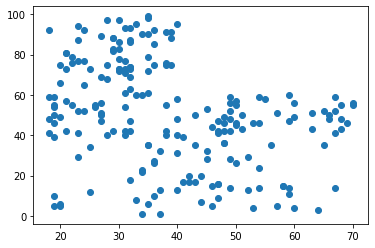

In [10]:
#Vizualization
plt.scatter(df['Age'], df['score'])

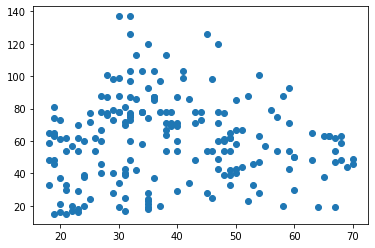

In [11]:
plt.scatter(df['Age'], df['income'])

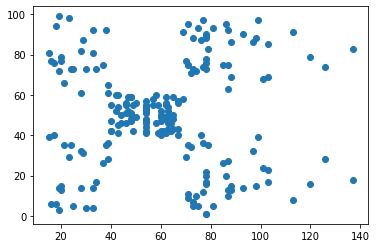

In [12]:
plt.scatter(df['income'], df['score'])

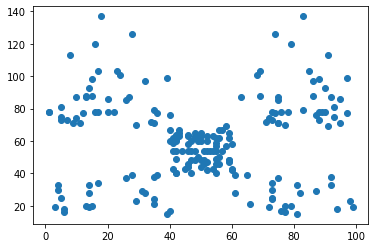

In [13]:
plt.scatter(df['score'],df['income'])

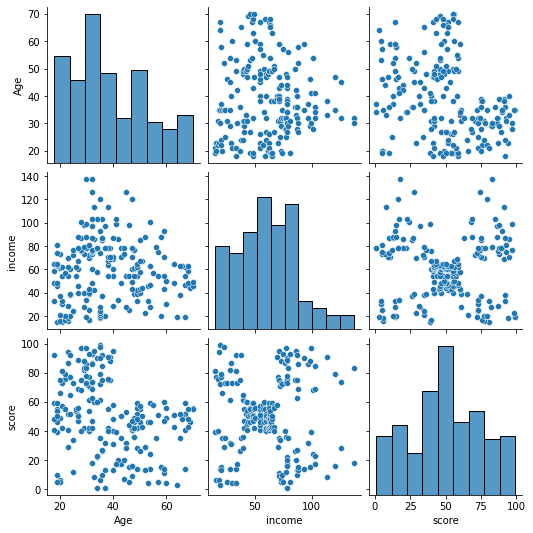

In [14]:
#pairplot
sns.pairplot(df[['Age', 'income', 'score']])

# K Means Cluster

In [15]:
import sklearn.cluster as cluster

In [16]:
kmeans = cluster.KMeans()

In [18]:
predicted = kmeans.fit_predict(df[['income','score']])

In [19]:
predicted

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 7, 2, 2, 2, 2, 2,
       2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 1, 7, 1, 6, 1, 6, 1,
       7, 1, 6, 1, 6, 1, 6, 1, 6, 1, 7, 1, 6, 1, 7, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 6, 1, 7, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1,
       6, 1, 6, 1, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5])

In [20]:
df['predicted_Cluster'] = predicted

In [21]:
df.head()

,Gender,Age,income,score,predicted_Cluster
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0


# Visualization

In [23]:
kmeans.cluster_centers_

array([[ 25.14285714,  19.52380952],
       [ 78.55172414,  82.17241379],
       [ 47.44444444,  51.24444444],
       [109.7       ,  22.        ],
       [ 25.0952381 ,  80.04761905],
       [109.7       ,  82.        ],
       [ 80.18181818,  12.68181818],
       [ 63.95238095,  46.21428571]])

In [24]:
df1 = df[df.predicted_Cluster == 0]
df2 = df[df.predicted_Cluster == 1]
df3 = df[df.predicted_Cluster == 2]
df4 = df[df.predicted_Cluster == 3]
df5 = df[df.predicted_Cluster == 4]
df6 = df[df.predicted_Cluster == 5]
df7 = df[df.predicted_Cluster == 6]
df8 = df[df.predicted_Cluster == 7]

In [28]:
df1.head()

,Gender,Age,income,score,predicted_Cluster
0,Male,19,15,39,0
2,Female,20,16,6,0
4,Female,31,17,40,0
6,Female,35,18,6,0
8,Male,64,19,3,0


In [29]:
df2.head()

,Gender,Age,income,score,predicted_Cluster
123,Male,39,69,91,1
125,Female,31,70,77,1
127,Male,40,71,95,1
129,Male,38,71,75,1
131,Male,39,71,75,1


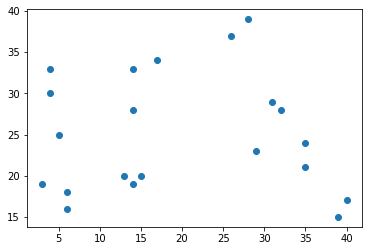

In [30]:
plt.scatter(df1['score'], df1['income'])

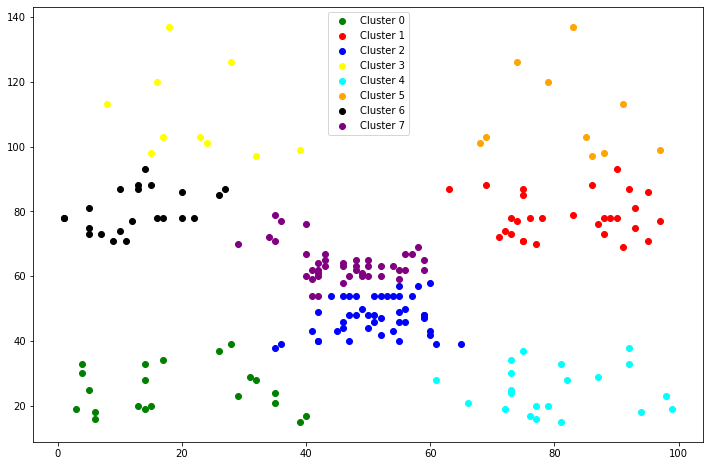

In [38]:

plt.figure(figsize=(12,8))

plt.scatter(df1['score'], df1['income'], color='green', label='Cluster 0')
plt.scatter(df2['score'], df2['income'], color='red', label='Cluster 1')
plt.scatter(df3['score'], df3['income'], color='blue', label='Cluster 2')
plt.scatter(df4['score'], df4['income'], color='yellow', label='Cluster 3')
plt.scatter(df5['score'], df5['income'], color='cyan', label='Cluster 4')
plt.scatter(df6['score'], df6['income'], color='orange', label='Cluster 5')
plt.scatter(df7['score'], df7['income'], color='black', label='Cluster 6')
plt.scatter(df8['score'], df8['income'], color='purple', label='Cluster 7')

plt.legend()

# Tuning / Optimization Cluster

In [42]:
from sklearn.cluster import KMeans

wcss = []

clusters = range(1,15)

for k in range(1,15):
    kmeans2 = KMeans(n_clusters=k)
    kmeans2.fit(df[['score','income']])
    wcss.append(kmeans2.inertia_)  # inertia_ = Sum of the squared error , SSE

C:\Users\Study Mart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25029.25342493588,
 21830.041978049438,
 19712.851860217077,
 17595.28888108518,
 16160.568363373975,
 14505.693873062424,
 12913.464244089244]

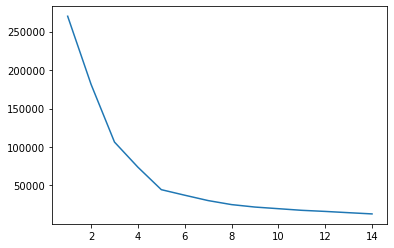

In [44]:
plt.plot(clusters , wcss) # elbow method

# After Tuning K=5

In [45]:
kmeans = cluster.KMeans(n_clusters=5)

In [46]:
new_predicted = kmeans.fit_predict(df[['income','score']])

In [47]:
df['new_clusters'] = new_predicted

In [48]:
df.head()

,Gender,Age,income,score,predicted_Cluster,new_clusters
0,Male,19,15,39,0,3
1,Male,21,15,81,4,2
2,Female,20,16,6,0,3
3,Female,23,16,77,4,2
4,Female,31,17,40,0,3


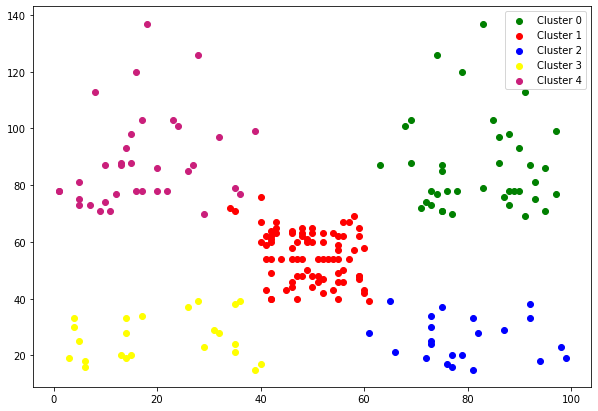

In [54]:
df1 = df[df.new_clusters == 0]
df2 = df[df.new_clusters == 1]
df3 = df[df.new_clusters == 2]
df4 = df[df.new_clusters == 3]
df5 = df[df.new_clusters == 4]

plt.figure(figsize=(10,7))

plt.scatter(df1['score'], df1['income'], color='green', label='Cluster 0')
plt.scatter(df2['score'], df2['income'], color='red', label='Cluster 1')
plt.scatter(df3['score'], df3['income'], color='blue', label='Cluster 2')
plt.scatter(df4['score'], df4['income'], color='yellow', label='Cluster 3')
plt.scatter(df5['score'], df5['income'], color='#CA1F7B', label='Cluster 4')

plt.legend()

In [59]:
center=kmeans.cluster_centers_
center

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

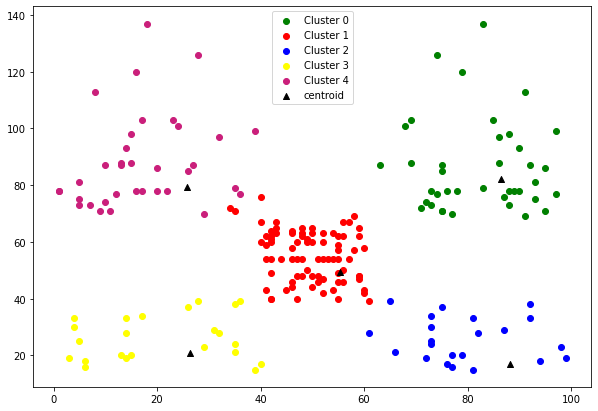

In [64]:
# WITH Centroid

df1 = df[df.new_clusters == 0]
df2 = df[df.new_clusters == 1]
df3 = df[df.new_clusters == 2]
df4 = df[df.new_clusters == 3]
df5 = df[df.new_clusters == 4]

plt.figure(figsize=(10,7))

plt.scatter(df1['score'], df1['income'], color='green', label='Cluster 0')
plt.scatter(df2['score'], df2['income'], color='red', label='Cluster 1')
plt.scatter(df3['score'], df3['income'], color='blue', label='Cluster 2')
plt.scatter(df4['score'], df4['income'], color='yellow', label='Cluster 3')
plt.scatter(df5['score'], df5['income'], color='#CA1F7B', label='Cluster 4')

plt.scatter(center[:,0], center[:,1], color='black', marker='^', label='centroid')

plt.legend()

# Kneed

In [65]:
!pip install kneed

In [67]:
from kneed import KneeLocator
kn = KneeLocator(clusters , wcss, curve='convex', direction = 'decreasing' )

In [68]:
kn

In [70]:
optimal_num_cluster = kn.knee
print('optimal_num_cluster = ', optimal_num_cluster)

optimal_num_cluster =  5
